# <div align=center>**Multiple Linear REgression**</div>
---

Simple linear regression is useful to make predictions but this type of regression uses only one feature, in the real worl we can have more than one features, in this case we have a Multiple Linear Regression

$$
 Y\ =\ \beta_0\ +\ \beta_1X_1\ +\ \beta_2X_2\ +\ ...\ +\ \beta_nX_n
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# import data
data = pd.read_csv('../datasets/co2_emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## **Preprocessing Data**

**Verify for missing values**

In [3]:
data.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

**Description of data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In this dataset we have 5 categorical features and 7 numerical features, where three are integer and 4 float

**Outliers**

In [10]:
numerical_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)

# dropping outliers
for feature in numerical_columns:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_extreme = q1 - 1.5*iqr
    upper_extreme = q3 + 1.5*iqr
    outliers = data[ (data[feature] < lower_extreme) | (data[feature]>upper_extreme) ].index
    data.drop(outliers, inplace=True)

## **EDA**

**Statistical description of data**

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6697.0,2.986905,1.188285,0.9,2.0,3.0,3.6,6.2
Cylinders,6697.0,5.362401,1.490685,3.0,4.0,6.0,6.0,8.0
Fuel Consumption City (L/100 km),6697.0,12.078513,2.642275,6.2,10.0,11.9,13.9,20.5
Fuel Consumption Hwy (L/100 km),6697.0,8.726415,1.693011,4.5,7.4,8.5,9.8,13.6
Fuel Consumption Comb (L/100 km),6697.0,10.570166,2.179491,6.3,8.9,10.4,12.1,17.0
Fuel Consumption Comb (mpg),6697.0,27.859191,5.788334,17.0,23.0,27.0,32.0,45.0
CO2 Emissions(g/km),6697.0,244.790951,48.538816,128.0,207.0,242.0,278.0,382.0


**Correlation between each feature and Co2 emission**

In [22]:
data.corr(numeric_only=True)['CO2 Emissions(g/km)']

Engine Size(L)                      0.835383
Cylinders                           0.821330
Fuel Consumption City (L/100 km)    0.935383
Fuel Consumption Hwy (L/100 km)     0.917607
Fuel Consumption Comb (L/100 km)    0.944949
Fuel Consumption Comb (mpg)        -0.935549
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

**Relationship between Engine Size ad CO2 Emissions**

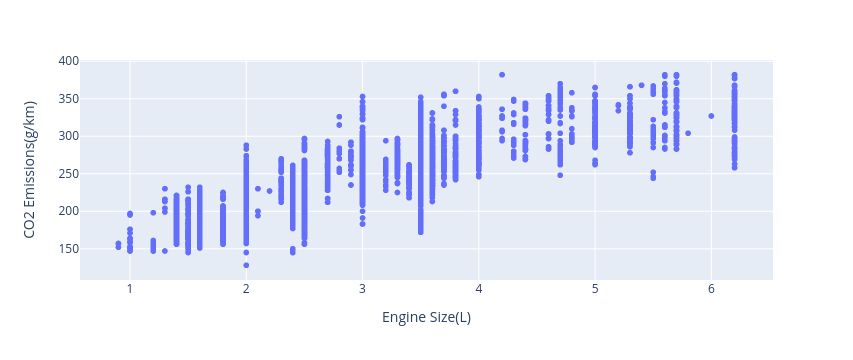

In [23]:
px.scatter( data, x='Engine Size(L)', y='CO2 Emissions(g/km)' )

**Relationship between Fuel consuption and CO2 emission**

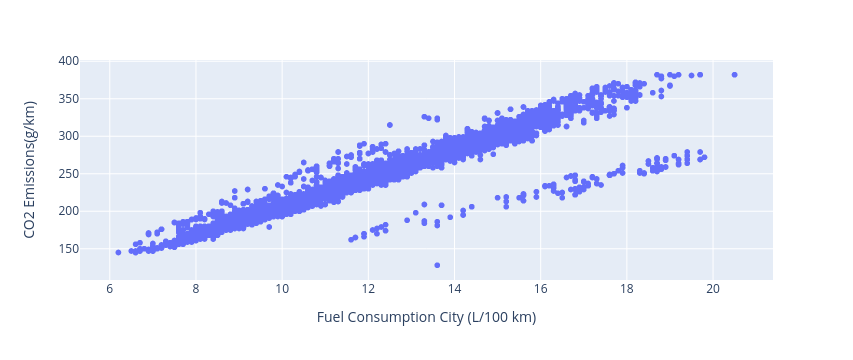

In [24]:
px.scatter( data, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)' )

## **ML Model**

**Split data into features and target**

*We will work only with numerical data*

In [27]:
co2 = data.select_dtypes(include=['float64', 'int64'])

X = co2.drop(['CO2 Emissions(g/km)'], axis=1)
y = co2['CO2 Emissions(g/km)']

**Select Features**

For now we will work with only 4 features

In [39]:
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest( score_func=chi2, k=5 )
best_features_fitted = best_features.fit(X, y)

dfscores = pd.DataFrame( best_features_fitted.scores_ )
dfcolumns = pd.DataFrame( X.columns )

features_scores = pd.concat( [dfcolumns, dfscores], axis=1 )
features_scores.columns = ['Specs', 'Score']

features = features_scores.nlargest(4, 'Score')['Specs'].values

In [41]:
# redefining X
X = co2[ features ]

**Train | Test Split**

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

**Scaling Data**

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Creation**

In [164]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_preds = linreg.predict(X_test)

**Evaluate Model**

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE={mean_squared_error(y_test, y_preds)}')
print(f'R2={r2_score(y_test, y_preds)}')

MSE=201.2348561695861
R2=0.9152521125237616


**Train Error VS Test Error**

In [166]:
# train error
train_preds = linreg.predict(X_train)
train_error = mean_squared_error(y_train, train_preds)

# test error
test_preds = linreg.predict(X_test)
test_error = mean_squared_error(y_test, test_preds)

print(f'Train Error: {train_error}')
print(f'Test Error: {test_error}')

Train Error: 196.04931828764933
Test Error: 201.2348561695861
